In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.drop('Name',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [7]:
print(df.Ticket.unique())

print(df.Cabin.unique())

print(df.Embarked.unique())

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

In [8]:
df=df.drop(['Ticket'],axis=1)


In [9]:
df=df.drop(['Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
df.shape

(891, 9)

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [12]:
df.shape

(891, 9)

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [15]:
mean_age=df['Age'].mean()
df['Age']=df['Age'].fillna(value=mean_age)

In [16]:
df.fillna(0,inplace=True)

In [17]:
df['Embarked'].fillna(df['Embarked'].mode())

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

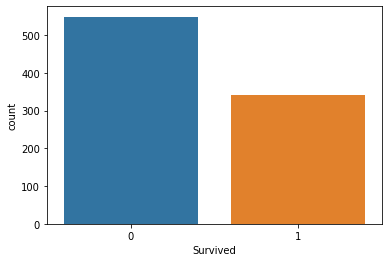

In [20]:
sns.countplot(x='Survived',data=df)

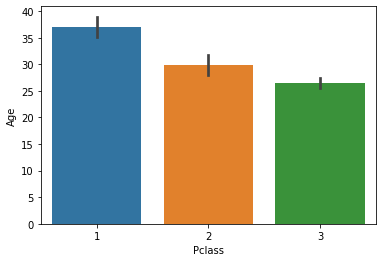

In [21]:
sns.barplot(x='Pclass',y='Age',data=df)

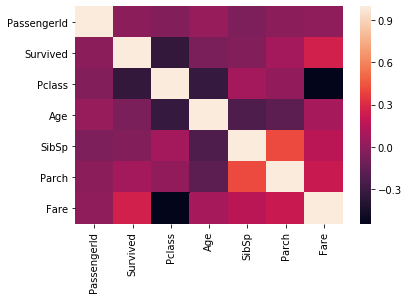

In [22]:
dfcor=df.corr()
sns.heatmap(dfcor)

In [23]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [25]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C


In [26]:
df['Embarked']=df['Embarked'].astype(str)

In [27]:
df['Embarked'] =le.fit_transform(df['Embarked'])

In [28]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1


In [29]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.270634
dtype: float64

In [30]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.173511
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.118492
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.039610
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.071480
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.043351
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.230365
Embarked,0.012985,-0.176509,0.173511,0.118492,-0.039610,0.071480,0.043351,-0.230365,1.000000


In [31]:
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape


(891, 9)

In [32]:
df_final=df.loc[(z_score<3).all(axis=1)]
df_final.shape

(818, 9)

In [33]:
df_final.skew()

PassengerId    0.003468
Survived       0.457268
Pclass        -0.639191
Sex           -0.671699
Age            0.311150
SibSp          1.975774
Parch          2.118544
Fare           2.342849
Embarked      -1.273629
dtype: float64

In [34]:
for col in df_final.columns:
    if df_final.skew().loc[col]>0.55:
        df_final[col]=np.log1p(df_final[col])

In [35]:
df_final.skew()

PassengerId    0.003468
Survived       0.457268
Pclass        -0.639191
Sex           -0.671699
Age            0.311150
SibSp          1.289094
Parch          1.828450
Fare           0.198492
Embarked      -1.273629
dtype: float64

In [36]:
df_x=df_final.drop(columns=['Survived'])
y=df_final['Survived']

In [37]:
df_x=np.array(df_x)

In [38]:
y=np.array(y)

In [39]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [40]:
#logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
log_reg=LogisticRegression()
maxf1_score(log_reg,df_x,y)

maximum f1_score is at random state : 62  and it is : 0.8062015503875969


In [41]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
f1_score_logistic=np.array([])
skf = StratifiedKFold(n_splits=4)
for train_index, test_index in skf.split(df_x, y):
    x_train, x_test = df_x[train_index], df_x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    tmp=f1_score(y_test,y_pred)
    f1_score_logistic=np.append(f1_score_logistic,[tmp])
print("mean f1 score for logsistic after stratified cross validation : ",np.mean(f1_score_logistic))
print("standard deviation for logistic from mean f1 score is : ",np.std(f1_score_logistic))
print("array of f1 scores : ",f1_score_logistic)

mean f1 score for logsistic after stratified cross validation :  0.7090198074787116
standard deviation for logistic from mean f1 score is :  0.028578671537894187
array of f1 scores :  [0.67123288 0.75       0.69863014 0.71621622]


In [42]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,df_x,y)

maximum f1_score is at random state : 75  and it is : 0.7703703703703704


In [43]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
f1_score_dc=np.array([])
skf = StratifiedKFold(n_splits=4)
for train_index, test_index in skf.split(df_x, y):
    x_train, x_test = df_x[train_index], df_x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dc.fit(x_train,y_train)
    y_pred=dc.predict(x_test)
    tmp=f1_score(y_test,y_pred)
    f1_score_dc=np.append(f1_score_dc,[tmp])
print("mean f1 score for decision after stratified cross validation : ",np.mean(f1_score_dc))
print("standard deviation for decision from mean f1 score is : ",np.std(f1_score_dc))
print("array of f1 scores : ",f1_score_dc)

mean f1 score for decision after stratified cross validation :  0.6476052303901009
standard deviation for decision from mean f1 score is :  0.07117672289945788
array of f1 scores :  [0.54285714 0.63917526 0.74172185 0.66666667]


In [44]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(df_x,y)
clf.best_params_

{'n_neighbors': 1}

In [45]:
kc=KNeighborsClassifier(n_neighbors=1)
maxf1_score(kc,df_x,y)

maximum f1_score is at random state : 82  and it is : 0.5271317829457365


In [46]:
from sklearn.model_selection import StratifiedKFold
f1_score_kc=np.array([])
skf = StratifiedKFold(n_splits=4)
for train_index, test_index in skf.split(df_x, y):
    x_train, x_test = df_x[train_index], df_x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    kc.fit(x_train,y_train)
    y_pred=kc.predict(x_test)
    tmp=f1_score(y_test,y_pred)
    f1_score_kc=np.append(f1_score_kc,[tmp])
print("mean f1 score for KNN after stratified cross validation : ",np.mean(f1_score_kc))
print("standard deviation for KNN from mean f1 score is : ",np.std(f1_score_kc))
print("array of f1 scores : ",f1_score_kc)

mean f1 score for KNN after stratified cross validation :  0.24710712952594255
standard deviation for KNN from mean f1 score is :  0.2524643446702829
array of f1 scores :  [0.         0.56737589 0.42105263 0.        ]


In [48]:
#Logistic Regression is performing better
x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = 91,test_size=0.20,stratify=y)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)